In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading  titanic data set into jupyter.

In [3]:
titdt=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/CS06 titanic_dataset.csv')
titdt.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Indexing using existing column.
Here we can make a existing column as index while load data into console using index_col = {either by using column index number of by 'column name'}

In [4]:
titdt=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/CS06 titanic_dataset.csv',index_col=0)
titdt.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now the passenger id become the index column.
# 3. Checking basic details of transformed data of titanic
## (i) Shape of Data 


In [5]:
nrow,ncol=titdt.shape
print('Number of Rows =',nrow)
print('Number of Columns =',ncol)

Number of Rows = 891
Number of Columns = 11


Which is clear that the there are 11 columns and 891 rows in this data set.
## (ii) Discriptive statistic of quanditative columns of data set.

In [6]:
titdt.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## (iii) Discriptive of qualitative data.

In [7]:
titdt.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Master. Sigvard Harald Elias",male,1601,G6,S
freq,1,577,7,4,644


**Interpretation**<br>
It is clear that we have 891 rows of name and no names where reapeted so we can say that the random sampling is good at all.<br>
If it comes to sex or gender, we have only two options say Male and Female, and data consist of more males than females.<br>
In case of Tickets, we have 891 entries and 681 of tickets and CA 2343 tickets were the most used tickest among the data.<br>
In case of cabin, we have 204 entiries of cabin and 147 items of cabin and anong the cabins B96, B98 we most used cabin.<br>
In case Embarked we have 889 entries and there types of embark among these S is most used embark.

## (iv) Details of rows and columns.

In [9]:
titdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Which is crystal clear that this data set of titanic are consist of 6 quanditative data and 5 qualitative data.
## (v) Find the missing and confirm it by using normal using method.

In [10]:
titdt.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Filling the missing using appropriate values.
## (i) Fill the missing value of Age.
### Checking the distributions of age make sure this method is appropriate.


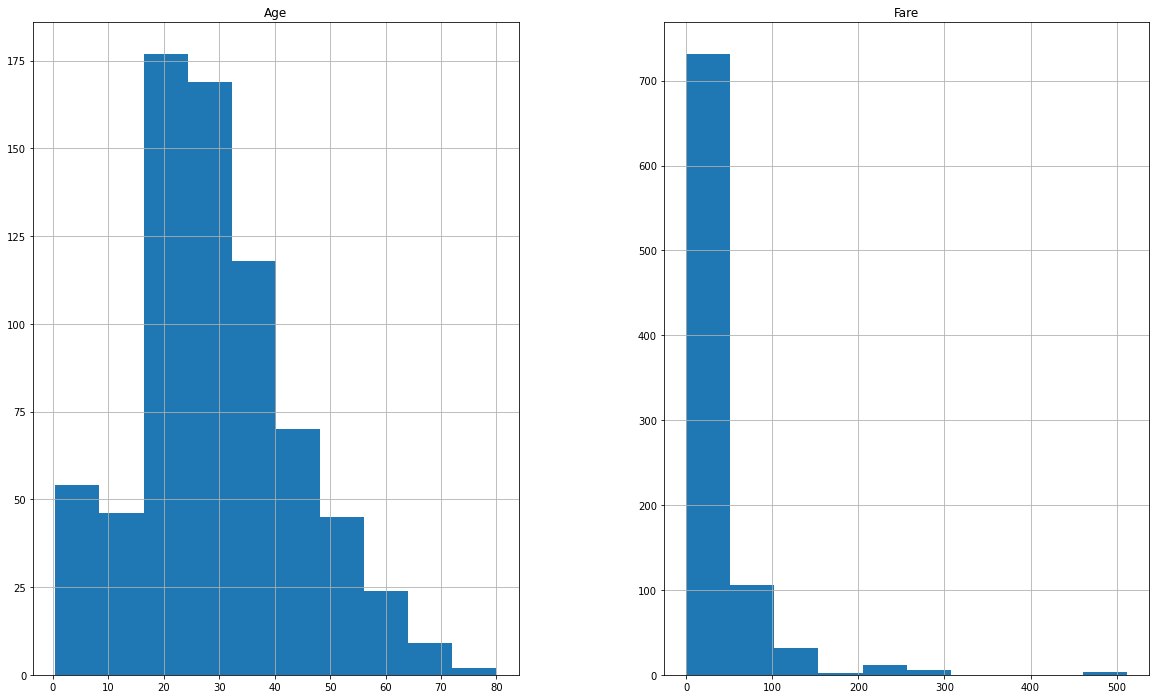

In [11]:
freqgp=titdt.select_dtypes(include='float')
freqgp.hist(figsize=(20, 12))
plt.show()

Here it is clear that the Distribution of age is right skewed, since a long tail towards right end.<br>
Which is mode > median > mean<br>
Since we can't use the mean for replacing, in such cases we can use Median or Mode. Here median would be approporiate.
### Filling the values using mean.

In [12]:
titdt['Age']=titdt['Age'].fillna(titdt['Age'].median())
titdt.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

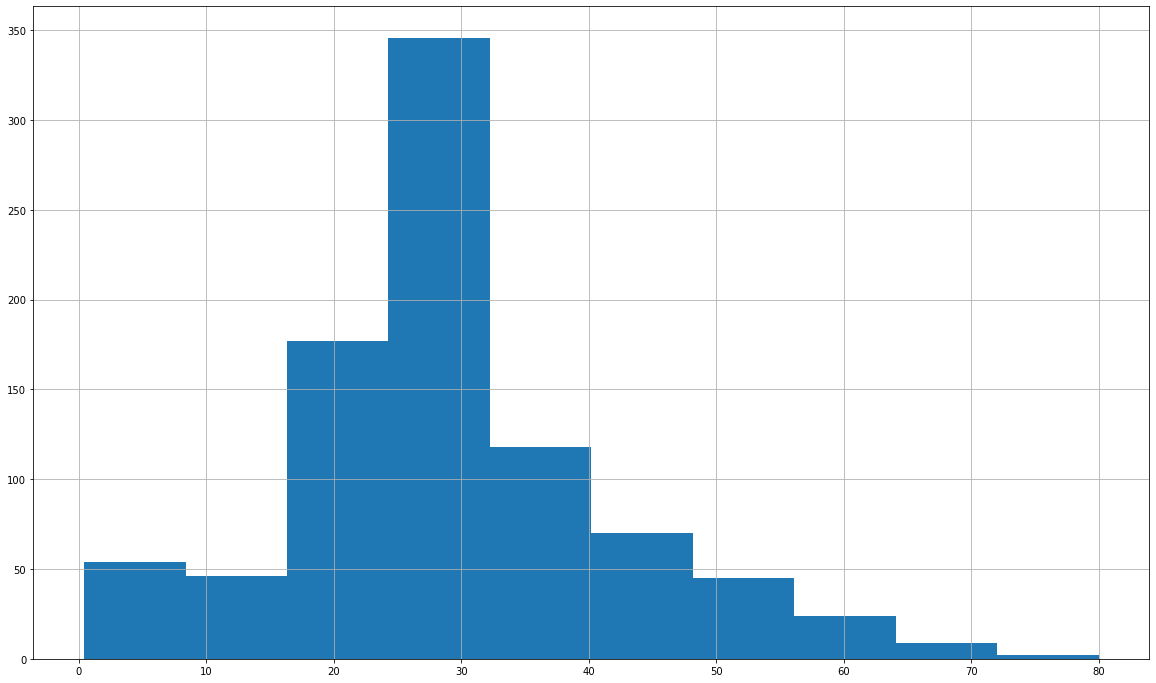

In [13]:
freqgp=titdt['Age']
freqgp.hist(figsize=(20, 12))
plt.show()

Almost become look like normally distributed.
## (ii)Filling for Object type datas.
Here we can't use Mean, Median or Mode. So here we can use forward or backword filling method.<br>
Since we have null values in first entry of Cabin column we cant use forward fill method<br>
Since we have to fill more than two columns we use loops to fill all together .

In [15]:
for i in ['Cabin','Embarked']:
    titdt[i]=titdt[i].fillna(axis=0,method='ffill')
titdt.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
titdt.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Andersson, Master. Sigvard Harald Elias",male,1601,C78,S
freq,1,577,7,33,645


# 5. Dealing with outliers in the data.

Here we can see that any of columns in Name, Sex and Ticket isnt changed and The top and freq values is changed, but it is not compulsory. That's why freq is not changed in case of Embarked.

### Boxplots

<AxesSubplot:>

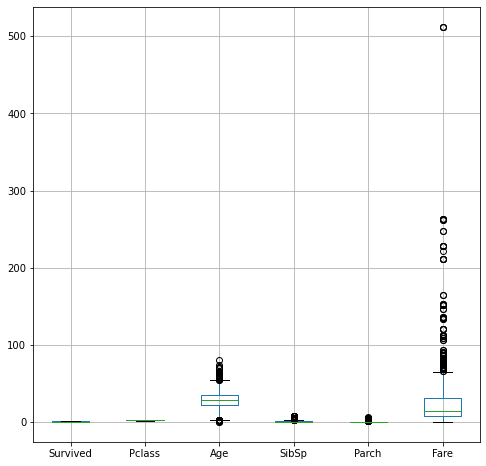

In [18]:
titdt.boxplot(figsize=(8,8))

Text(0.5, 1.0, 'Box plot of Fare')

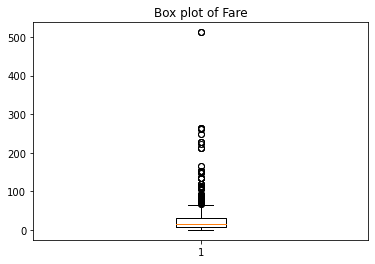

In [19]:
plt.boxplot(titdt['Fare'])
plt.title('Box plot of Fare')

#### Step 1. Finding Min and Max Outliers For Fare.

In [23]:
Q1=np.percentile(titdt['Fare'],25,interpolation='midpoint')
Q3=np.percentile(titdt['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
LO=Q1-(1.5*IQR)
UO=Q3+(1.5*IQR)
print('Lower outlier is',LO,'& Upper outlier is =',UO)

Lower outlier is -26.724 & Upper outlier is = 65.6344


#### Step 2. Find the values of outliers.

In [26]:
outlier=[]
for i in titdt['Fare']:
    if ((i > UO)or(i < LO)):
        outlier.append(i)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

#### Step 3. Finding the indexes of outliers.

In [31]:
indf=titdt['Fare']>UO
f1=titdt.loc[indf].index
f1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

#### Step 4.Droping values.

In [33]:
titdt.drop(f1,inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

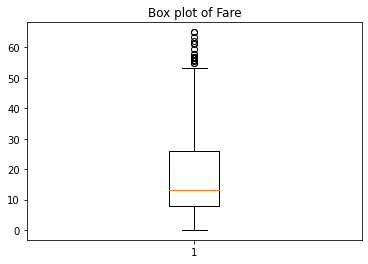

In [34]:
plt.boxplot(titdt['Fare'])
plt.title('Box plot of Fare')

#### Similarly for all remaining columns.

Text(0.5, 1.0, 'Box plot of Age')

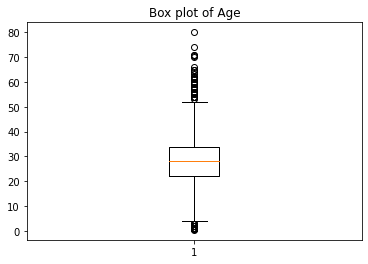

In [35]:
plt.boxplot(titdt['Age'])
plt.title('Box plot of Age')

Lower outlier is 4.0 & Upper outlier is = 52.0


Text(0.5, 1.0, 'Box plot of Age')

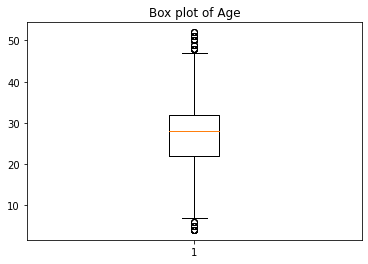

In [36]:
Q1=np.percentile(titdt['Age'],25,interpolation='midpoint')
Q3=np.percentile(titdt['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
LO=Q1-(1.5*IQR)
UO=Q3+(1.5*IQR)
print('Lower outlier is',LO,'& Upper outlier is =',UO)

outlier=[]
for i in titdt['Age']:
    if ((i > UO)or(i < LO)):
        outlier.append(i)
outlier
indf=titdt['Age']>UO
f2=titdt.loc[indf].index
f1
indf=titdt['Age']<LO
f3=titdt.loc[indf].index
f3
titdt.drop(f2,inplace=True)
titdt.drop(f3,inplace=True)
plt.boxplot(titdt['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of SibSp')

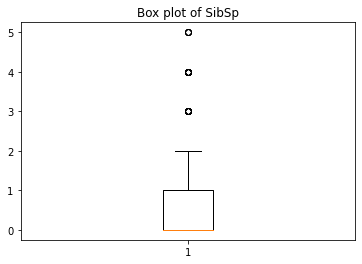

In [37]:
plt.boxplot(titdt['SibSp'])
plt.title('Box plot of SibSp')

Lower outlier is -1.5 & Upper outlier is = 2.5


Text(0.5, 1.0, 'Box plot of SibSp')

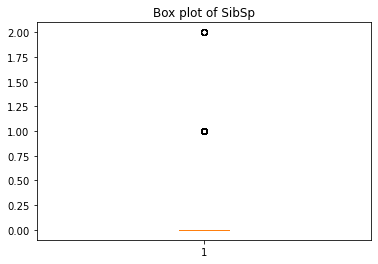

In [38]:
Q1=np.percentile(titdt['SibSp'],25,interpolation='midpoint')
Q3=np.percentile(titdt['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
LO=Q1-(1.5*IQR)
UO=Q3+(1.5*IQR)
print('Lower outlier is',LO,'& Upper outlier is =',UO)

outlier=[]
for i in titdt['SibSp']:
    if ((i > UO)or(i < LO)):
        outlier.append(i)
outlier
indf=titdt['SibSp']>UO
f4=titdt.loc[indf].index
titdt.drop(f4,inplace=True)
plt.boxplot(titdt['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Parch')

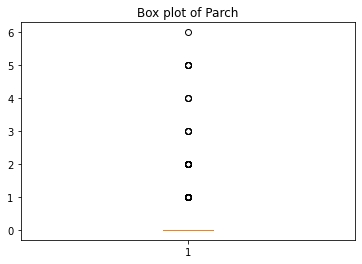

In [39]:
plt.boxplot(titdt['Parch'])
plt.title('Box plot of Parch')

Lower outlier is 0.0 & Upper outlier is = 0.0


Text(0.5, 1.0, 'Box plot of Parch')

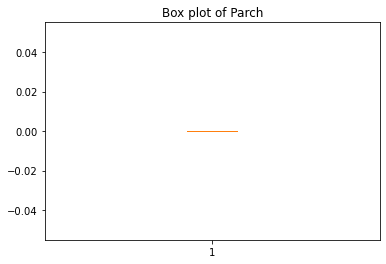

In [40]:
Q1=np.percentile(titdt['Parch'],25,interpolation='midpoint')
Q3=np.percentile(titdt['Parch'],75,interpolation='midpoint')
IQR=Q3-Q1
LO=Q1-(1.5*IQR)
UO=Q3+(1.5*IQR)
print('Lower outlier is',LO,'& Upper outlier is =',UO)

outlier=[]
for i in titdt['Parch']:
    if ((i > UO)or(i < LO)):
        outlier.append(i)
outlier
indf=titdt['Parch']>UO
f5=titdt.loc[indf].index
titdt.drop(f5,inplace=True)
plt.boxplot(titdt['Parch'])
plt.title('Box plot of Parch')

# 6. Min Max Scaling 

In [46]:
nfs=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/CS06 titanic_dataset.csv',index_col=0)
titdt.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,D56,S


In [77]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [81]:
survived=nfs.Survived
survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [93]:
survm=survived.values.reshape(-1,1)
mmscaling=preprocessing.MinMaxScaler(feature_range=(0,1))
scsur=mmscaling.fit_transform(survm)
df=pd.DataFrame(data=scsur)
df.describe()

,0
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
